In [37]:
import requests

In [102]:
year = '2013'
years = list(range(2009, 2020))
years

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [118]:
all_years_results = []

In [119]:
for year in years:
    params = {
        'state': '06',
        'key': 'copperkit98',
        'email': 'huntingcarlisle@gmail.com',
        'param': '42101',
        'bdate': f'{year}0101',
        'edate': f'{year}1231'
    }

    url = f'https://aqs.epa.gov/data/api/dailyData/byState'

    response = requests.get(url, params=params)
    try:
        response_json = response.json()['Data']
        for day in response_json:
            day['year'] = str(year)
    except Exception as e:
        print(f'Failed to parse {year}: {e}')
    else:
        all_years_results = all_years_results + response_json
    

In [120]:
all_years_df = pd.DataFrame(all_years_results)
all_years_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change,year
0,06,083,1008,42101,1,34.942872,-120.435611,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,INSTRUMENTAL - NONDISPERSIVE INFRARED,Santa Maria,906 S BROADWAY - SANTA MARIA,California,Santa Barbara,Santa Maria,42200,"Santa Maria-Santa Barbara, CA",2016-04-11,2009
1,06,083,1008,42101,1,34.942872,-120.435611,NAD83,Carbon monoxide,1 HOUR,...,INSTRUMENTAL - NONDISPERSIVE INFRARED,Santa Maria,906 S BROADWAY - SANTA MARIA,California,Santa Barbara,Santa Maria,42200,"Santa Maria-Santa Barbara, CA",2016-04-11,2009
2,06,083,1008,42101,1,34.942872,-120.435611,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,INSTRUMENTAL - NONDISPERSIVE INFRARED,Santa Maria,906 S BROADWAY - SANTA MARIA,California,Santa Barbara,Santa Maria,42200,"Santa Maria-Santa Barbara, CA",2016-04-11,2009
3,06,083,1008,42101,1,34.942872,-120.435611,NAD83,Carbon monoxide,1 HOUR,...,INSTRUMENTAL - NONDISPERSIVE INFRARED,Santa Maria,906 S BROADWAY - SANTA MARIA,California,Santa Barbara,Santa Maria,42200,"Santa Maria-Santa Barbara, CA",2016-04-11,2009
4,06,083,1008,42101,1,34.942872,-120.435611,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,INSTRUMENTAL - NONDISPERSIVE INFRARED,Santa Maria,906 S BROADWAY - SANTA MARIA,California,Santa Barbara,Santa Maria,42200,"Santa Maria-Santa Barbara, CA",2016-04-11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551254,06,025,0005,42101,3,32.676180,-115.483070,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Calexico-Ethel Street,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,20940,"El Centro, CA",2020-03-30,2019
551255,06,025,0005,42101,3,32.676180,-115.483070,NAD83,Carbon monoxide,1 HOUR,...,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Calexico-Ethel Street,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,20940,"El Centro, CA",2020-03-30,2019
551256,06,025,0005,42101,3,32.676180,-115.483070,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Calexico-Ethel Street,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,20940,"El Centro, CA",2020-03-30,2019
551257,06,025,0005,42101,3,32.676180,-115.483070,NAD83,Carbon monoxide,1 HOUR,...,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Calexico-Ethel Street,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,20940,"El Centro, CA",2020-03-30,2019


In [125]:
all_years_df.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration',
       'pollutant_standard', 'date_local', 'units_of_measure', 'event_type',
       'observation_count', 'observation_percent', 'validity_indicator',
       'arithmetic_mean', 'first_max_value', 'first_max_hour', 'aqi',
       'method_code', 'method', 'local_site_name', 'site_address', 'state',
       'county', 'city', 'cbsa_code', 'cbsa', 'date_of_last_change', 'year'],
      dtype='object')

In [123]:
import matplotlib.pyplot as plt

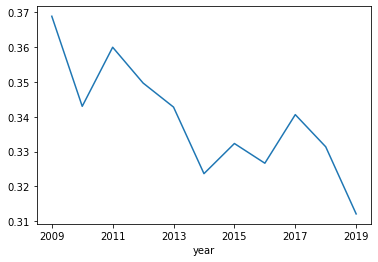

In [124]:
all_years_df.groupby('year').mean()['arithmetic_mean'].plot(kind='line')
plt.show()

In [83]:
co2_df = pd.DataFrame(response.json()['Data'])
co2_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,061,0006,42102,1,38.74643,-121.26498,NAD83,Carbon dioxide,1 HOUR,...,011,INSTRUMENTAL - INFRARED ABSORPTION,Roseville-N Sunrise Ave,"151 NO SUNRISE BLVD, ROSEVILLE, CA",California,Placer,Roseville,40900,"Sacramento--Roseville--Arden-Arcade, CA",2013-06-10
1,06,061,0006,42102,1,38.74643,-121.26498,NAD83,Carbon dioxide,1 HOUR,...,011,INSTRUMENTAL - INFRARED ABSORPTION,Roseville-N Sunrise Ave,"151 NO SUNRISE BLVD, ROSEVILLE, CA",California,Placer,Roseville,40900,"Sacramento--Roseville--Arden-Arcade, CA",2013-06-10
2,06,061,0006,42102,1,38.74643,-121.26498,NAD83,Carbon dioxide,1 HOUR,...,011,INSTRUMENTAL - INFRARED ABSORPTION,Roseville-N Sunrise Ave,"151 NO SUNRISE BLVD, ROSEVILLE, CA",California,Placer,Roseville,40900,"Sacramento--Roseville--Arden-Arcade, CA",2013-06-10
3,06,061,0006,42102,1,38.74643,-121.26498,NAD83,Carbon dioxide,1 HOUR,...,011,INSTRUMENTAL - INFRARED ABSORPTION,Roseville-N Sunrise Ave,"151 NO SUNRISE BLVD, ROSEVILLE, CA",California,Placer,Roseville,40900,"Sacramento--Roseville--Arden-Arcade, CA",2013-06-10
4,06,061,0006,42102,1,38.74643,-121.26498,NAD83,Carbon dioxide,1 HOUR,...,011,INSTRUMENTAL - INFRARED ABSORPTION,Roseville-N Sunrise Ave,"151 NO SUNRISE BLVD, ROSEVILLE, CA",California,Placer,Roseville,40900,"Sacramento--Roseville--Arden-Arcade, CA",2013-06-10


In [91]:
co2_df_2017 = pd.DataFrame(response.json()['Data'])
co2_df_2017.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,071,9011,42102,3,34.08555,-117.31301,NAD83,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,San Bernardino-Mt. Vernon Ave.,"701 S Mt Vernon Ave, San Bernardino, CA 92410",California,San Bernardino,San Bernardino,40140,"Riverside-San Bernardino-Ontario, CA",2018-08-27
1,06,071,9011,42102,3,34.08555,-117.31301,NAD83,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,San Bernardino-Mt. Vernon Ave.,"701 S Mt Vernon Ave, San Bernardino, CA 92410",California,San Bernardino,San Bernardino,40140,"Riverside-San Bernardino-Ontario, CA",2018-08-27
2,06,071,9011,42102,3,34.08555,-117.31301,NAD83,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,San Bernardino-Mt. Vernon Ave.,"701 S Mt Vernon Ave, San Bernardino, CA 92410",California,San Bernardino,San Bernardino,40140,"Riverside-San Bernardino-Ontario, CA",2018-08-27
3,06,071,9011,42102,3,34.08555,-117.31301,NAD83,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,San Bernardino-Mt. Vernon Ave.,"701 S Mt Vernon Ave, San Bernardino, CA 92410",California,San Bernardino,San Bernardino,40140,"Riverside-San Bernardino-Ontario, CA",2018-08-27
4,06,071,9011,42102,3,34.08555,-117.31301,NAD83,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,San Bernardino-Mt. Vernon Ave.,"701 S Mt Vernon Ave, San Bernardino, CA 92410",California,San Bernardino,San Bernardino,40140,"Riverside-San Bernardino-Ontario, CA",2018-08-27


In [100]:
co2_df_2013 = pd.DataFrame(response.json()['Data'])
co2_df_2013.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,06,019,2009,42102,3,36.634225,-120.382331,WGS84,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,California,Fresno,Not in a city,23420,"Fresno, CA",2019-04-24
1,06,019,2009,42102,3,36.634225,-120.382331,WGS84,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,California,Fresno,Not in a city,23420,"Fresno, CA",2019-04-24
2,06,019,2009,42102,3,36.634225,-120.382331,WGS84,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,California,Fresno,Not in a city,23420,"Fresno, CA",2019-04-24
3,06,019,2009,42102,3,36.634225,-120.382331,WGS84,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,California,Fresno,Not in a city,23420,"Fresno, CA",2019-04-24
4,06,019,2009,42102,3,36.634225,-120.382331,WGS84,Carbon dioxide,1 HOUR,...,561,INSTRUMENTAL - Wavelength-Scanned Cavity Ringd...,Tranquillity,32650 West Adams Avenue Tranquillity CA 93668,California,Fresno,Not in a city,23420,"Fresno, CA",2019-04-24


In [92]:
co2_df['arithmetic_mean'].mean()

430.4245735252527

In [101]:
co2_df_2013['arithmetic_mean'].mean()

409.2131320576368

In [93]:
co2_df_2017['arithmetic_mean'].mean()

422.4017429043717